In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

%matplotlib inline

In [14]:
df = pd.read_csv('data/happiness_2015.csv')
df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


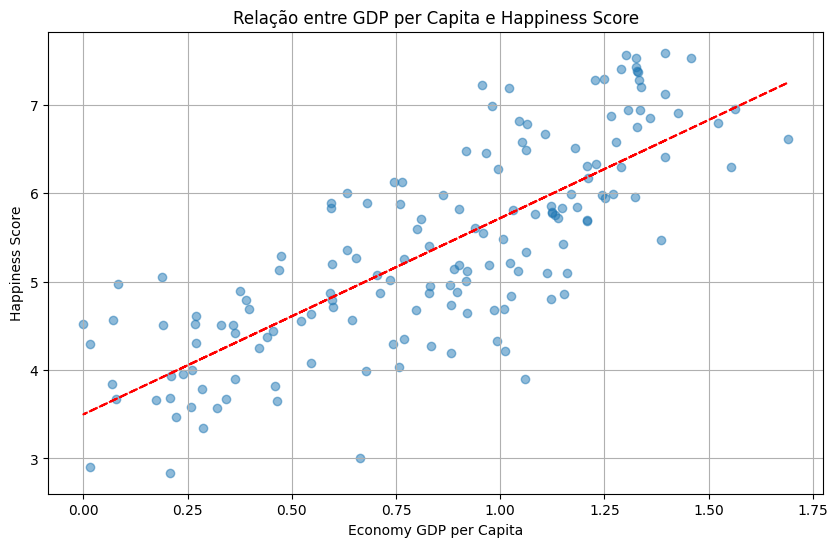

In [17]:

# Supondo que df seja o seu DataFrame
# df = pd.read_csv('seu_arquivo.csv') # Descomente e ajuste o caminho do arquivo conforme necessário

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'], alpha=0.5)

# Calculando a linha de melhor ajuste
z = np.polyfit(df['Economy (GDP per Capita)'], df['Happiness Score'], 1)
p = np.poly1d(z)

# Adicionando a linha de tendência ao gráfico
plt.plot(df['Economy (GDP per Capita)'], p(df['Economy (GDP per Capita)']), "r--")

# Adicionando títulos e rótulos
plt.title('Relação entre GDP per Capita e Happiness Score')
plt.xlabel('Economy GDP per Capita')
plt.ylabel('Happiness Score')

# Mostrando o gráfico
plt.grid(True)
plt.show()

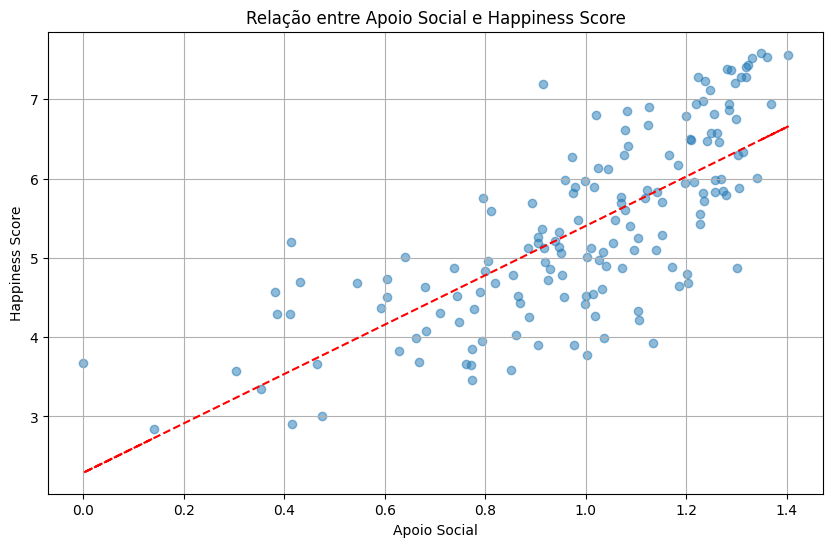

In [18]:

# Supondo que df seja o seu DataFrame
# df = pd.read_csv('seu_arquivo.csv') # Descomente e ajuste o caminho do arquivo conforme necessário

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Family'], df['Happiness Score'], alpha=0.5)

# Calculando a linha de melhor ajuste
z = np.polyfit(df['Family'], df['Happiness Score'], 1)
p = np.poly1d(z)

# Adicionando a linha de tendência ao gráfico
plt.plot(df['Family'], p(df['Family']), "r--")

# Adicionando títulos e rótulos
plt.title('Relação entre Apoio Social e Happiness Score')
plt.xlabel('Apoio Social')
plt.ylabel('Happiness Score')

# Mostrando o gráfico
plt.grid(True)
plt.show()